# Trying various updates like hyper parameter tuning in Random Forest


# TRIAL 1

### Target Mean Squared log Error = 0.061659674782061365

## Proposed Changes in Algo: 
1. n_estimator = 2000     err : 0.06153068923495113 reduce:)))))
2. n_estimator = 1500     err : 
3. n_estimator = 1200     err : 
4. n_estimator = 3000     err : 
5. n_estimator = 2500     err : 0.061464510643495465

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('./sangam_Train_4.csv')

In [4]:
df.head()

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume,Year,Month,Day,Hour,Day_of_week
0,2012-10-02 09:00:00,0,121,89,2,329,1,1,288.28,0.0,0.0,40,0,0,5545,2012,10,2,9,1
1,2012-10-02 10:00:00,0,178,67,3,330,1,1,289.36,0.0,0.0,75,0,1,4516,2012,10,2,10,1
2,2012-10-02 11:00:00,0,113,66,3,329,2,2,289.58,0.0,0.0,90,0,2,4767,2012,10,2,11,1
3,2012-10-02 12:00:00,0,20,66,3,329,5,5,290.13,0.0,0.0,90,0,2,5026,2012,10,2,12,1
4,2012-10-02 13:00:00,0,281,65,3,329,7,7,291.14,0.0,0.0,75,0,1,4918,2012,10,2,13,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28589 entries, 0 to 28588
Data columns (total 20 columns):
date_time              28589 non-null object
is_holiday             28589 non-null int64
air_pollution_index    28589 non-null int64
humidity               28589 non-null int64
wind_speed             28589 non-null int64
wind_direction         28589 non-null int64
visibility_in_miles    28589 non-null int64
dew_point              28589 non-null int64
temperature            28589 non-null float64
rain_p_h               28589 non-null float64
snow_p_h               28589 non-null float64
clouds_all             28589 non-null int64
weather_type           28589 non-null int64
weather_description    28589 non-null int64
traffic_volume         28589 non-null int64
Year                   28589 non-null int64
Month                  28589 non-null int64
Day                    28589 non-null int64
Hour                   28589 non-null int64
Day_of_week            28589 non-null int64
dtyp

In [6]:
del df['date_time']
del df['dew_point']

In [7]:
df.head()

,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume,Year,Month,Day,Hour,Day_of_week
0,0,121,89,2,329,1,288.28,0.0,0.0,40,0,0,5545,2012,10,2,9,1
1,0,178,67,3,330,1,289.36,0.0,0.0,75,0,1,4516,2012,10,2,10,1
2,0,113,66,3,329,2,289.58,0.0,0.0,90,0,2,4767,2012,10,2,11,1
3,0,20,66,3,329,5,290.13,0.0,0.0,90,0,2,5026,2012,10,2,12,1
4,0,281,65,3,329,7,291.14,0.0,0.0,75,0,1,4918,2012,10,2,13,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28589 entries, 0 to 28588
Data columns (total 18 columns):
is_holiday             28589 non-null int64
air_pollution_index    28589 non-null int64
humidity               28589 non-null int64
wind_speed             28589 non-null int64
wind_direction         28589 non-null int64
visibility_in_miles    28589 non-null int64
temperature            28589 non-null float64
rain_p_h               28589 non-null float64
snow_p_h               28589 non-null float64
clouds_all             28589 non-null int64
weather_type           28589 non-null int64
weather_description    28589 non-null int64
traffic_volume         28589 non-null int64
Year                   28589 non-null int64
Month                  28589 non-null int64
Day                    28589 non-null int64
Hour                   28589 non-null int64
Day_of_week            28589 non-null int64
dtypes: float64(3), int64(15)
memory usage: 3.9 MB


In [10]:
cols = df.columns

In [11]:
cols = list(cols)

In [12]:
print( cols)

['is_holiday', 'air_pollution_index', 'humidity', 'wind_speed', 'wind_direction', 'visibility_in_miles', 'temperature', 'rain_p_h', 'snow_p_h', 'clouds_all', 'weather_type', 'weather_description', 'traffic_volume', 'Year', 'Month', 'Day', 'Hour', 'Day_of_week']


In [13]:
del cols[12]

In [14]:
cols.append('traffic_volume')

In [15]:
print(cols)

['is_holiday', 'air_pollution_index', 'humidity', 'wind_speed', 'wind_direction', 'visibility_in_miles', 'temperature', 'rain_p_h', 'snow_p_h', 'clouds_all', 'weather_type', 'weather_description', 'Year', 'Month', 'Day', 'Hour', 'Day_of_week', 'traffic_volume']


In [16]:
df = df[cols]

#### Co-rrelational matrix

In [17]:
df.corr()

,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,Year,Month,Day,Hour,Day_of_week,traffic_volume
is_holiday,1.000000e+00,0.002094,-3.021066e-07,0.000532,0.000594,-0.006134,-0.004707,-0.000245,-0.000898,0.002291,0.007241,0.007861,-0.003286,0.009352,-0.000843,-0.060337,-0.031795,-0.044855
air_pollution_index,2.094148e-03,1.000000,9.442761e-04,-0.003600,-0.001928,0.001730,0.006580,0.000510,0.007683,-0.007496,-0.002927,0.009067,-0.007850,0.007323,0.010243,0.003463,0.000838,-0.000009
humidity,-3.021066e-07,0.000944,1.000000e+00,-0.146912,-0.050006,0.004856,0.037503,-0.013277,0.016852,0.005761,0.032887,0.018935,-0.041755,0.158445,0.061190,0.003046,-0.010471,0.022977
wind_speed,5.320423e-04,-0.003600,-1.469122e-01,1.000000,0.188301,-0.005117,-0.057985,0.001508,-0.003643,-0.003953,-0.015747,-0.038240,0.088887,-0.096616,0.008019,0.003964,-0.018999,0.001526
wind_direction,5.937362e-04,-0.001928,-5.000575e-02,0.188301,1.000000,-0.002278,-0.048054,0.002394,0.004445,0.024359,0.016793,-0.001341,0.009535,0.058677,-0.013207,0.005313,-0.019179,0.007366
visibility_in_miles,-6.133781e-03,0.001730,4.855529e-03,-0.005117,-0.002278,1.000000,0.002724,-0.009105,-0.002168,-0.003313,0.004356,0.005392,-0.001774,-0.003402,0.000132,0.000128,0.004879,0.001492
temperature,-4.707401e-03,0.006580,3.750258e-02,-0.057985,-0.048054,0.002724,1.000000,0.010297,-0.016147,-0.121615,-0.113663,0.049984,0.090984,0.229044,0.016539,0.122892,-0.010034,0.136161
rain_p_h,-2.450698e-04,0.000510,-1.327706e-02,0.001508,0.002394,-0.009105,0.010297,1.000000,-0.000141,0.005592,0.002932,0.018171,0.005148,0.001223,-0.002986,0.004517,-0.009007,0.006494
snow_p_h,-8.983583e-04,0.007683,1.685205e-02,-0.003643,0.004445,-0.002168,-0.016147,-0.000141,1.000000,0.028005,0.033337,0.010343,0.010400,0.018475,0.015768,0.010056,-0.013703,-0.002185
clouds_all,2.290940e-03,-0.007496,5.760651e-03,-0.003953,0.024359,-0.003313,-0.121615,0.005592,0.028005,1.000000,0.185114,-0.065338,-0.089866,-0.035576,0.059020,0.021290,-0.041866,0.044466


In [18]:
del df['Year']
del df['Month']
del df['Day'] #inserted day of week instead.....kind of nichod of dates :}
del df['weather_description']
del df['wind_direction']

In [19]:
df.head()

,is_holiday,air_pollution_index,humidity,wind_speed,visibility_in_miles,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,Hour,Day_of_week,traffic_volume
0,0,121,89,2,1,288.28,0.0,0.0,40,0,9,1,5545
1,0,178,67,3,1,289.36,0.0,0.0,75,0,10,1,4516
2,0,113,66,3,2,289.58,0.0,0.0,90,0,11,1,4767
3,0,20,66,3,5,290.13,0.0,0.0,90,0,12,1,5026
4,0,281,65,3,7,291.14,0.0,0.0,75,0,13,1,4918


In [20]:
df.shape

(28589, 13)

In [21]:
from sklearn.preprocessing import *

In [22]:
X = df.iloc[:, : -1].values
y = df.iloc[:, 12].values

In [23]:
y

array([5545, 4516, 4767, ..., 2348, 2194, 1328], dtype=int64)

In [25]:
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

In [26]:
scaler_x.fit(X)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [27]:
X = scaler_x.transform(X)

In [28]:
y = y.reshape(-1,1)
scaler_y.fit(y)
y = scaler_y.transform(y)

In [29]:
from sklearn.model_selection import train_test_split

In [87]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 0)

In [88]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 2500, random_state = 0)
regressor.fit(X_train, y_train)
#changes will be proposed in this cell

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=2500,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [80]:
# reg = RandomForestRegressor? # refrence here
 

refrences:   https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [81]:
#reg = RandomForestRegressor

In [89]:
y_pred = regressor.predict(X_test)

In [90]:
y_pred = y_pred.reshape(-1,1)
y_pred = scaler_y.inverse_transform(y_pred)

In [91]:
y_test = scaler_y.inverse_transform(y_test)

In [92]:
from sklearn.metrics import mean_squared_log_error

In [93]:
mean_squared_log_error(y_test,y_pred) # to be improved score

0.061464510643495465

#### VISUALISATION OF PRED AND ERROR

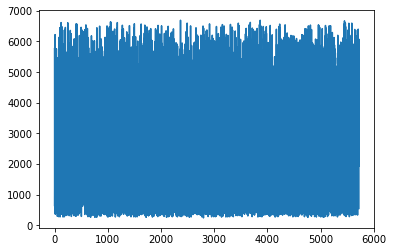

In [64]:
plt.plot(y_pred)
plt.show()

In [44]:
previous = mean_squared_log_error(y_test,y_pred.astype(int))